# Credit Card Score
In this notebook, we will go through the credit card score dataset for exploratory data analysis (EDA) and feature engineering for machine learning model. We have to understands how the credit score is affected by other variables such age, accupation, payment behaviour etc.

A credit score is a number from 300 to 850 (in the dataset is categorized as poor, standard, and good) that rates a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.

## 1. Dataset
The dataset used in this module was downloaded from https://www.kaggle.com/datasets/parisrohan/credit-score-classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Read dataset
df = pd.read_csv("../data/train.csv")

In [3]:
# Get shape info
print(df.shape)

(100000, 28)


In [4]:
# Sample some data
df.head(5).T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("Numerical features: ", len(numeric_features))
print("Categorical features: ", len(categorical_features))

Numerical features:  8
Categorical features:  20


## 2. EDA
We will analyzed the following:
1. Analyzing missing data
2. Fixing object variables that should be in numerical
3. Feature analysis
4. Target variable analysis

### 2.1. Analyzing missing values

In [7]:
# Inspect any missing values
df.isna().mean().sort_values(ascending=False)

Monthly_Inhand_Salary       0.15002
Type_of_Loan                0.11408
Name                        0.09985
Credit_History_Age          0.09030
Num_of_Delayed_Payment      0.07002
Amount_invested_monthly     0.04479
Num_Credit_Inquiries        0.01965
Monthly_Balance             0.01200
ID                          0.00000
Changed_Credit_Limit        0.00000
Payment_Behaviour           0.00000
Total_EMI_per_month         0.00000
Payment_of_Min_Amount       0.00000
Credit_Utilization_Ratio    0.00000
Outstanding_Debt            0.00000
Credit_Mix                  0.00000
Delay_from_due_date         0.00000
Customer_ID                 0.00000
Num_of_Loan                 0.00000
Interest_Rate               0.00000
Num_Credit_Card             0.00000
Num_Bank_Accounts           0.00000
Annual_Income               0.00000
Occupation                  0.00000
SSN                         0.00000
Age                         0.00000
Month                       0.00000
Credit_Score                

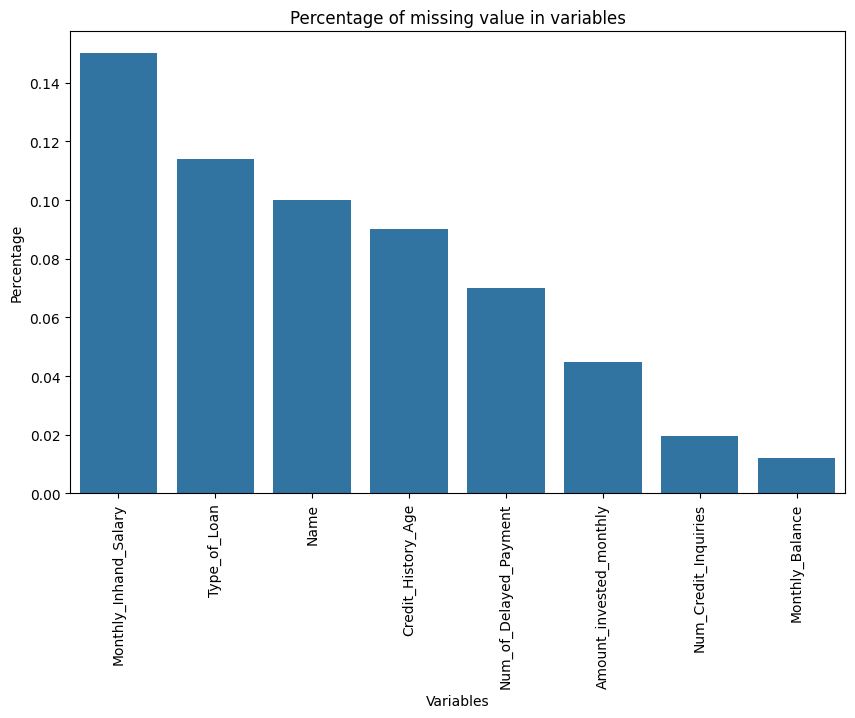

In [8]:
# Plot a list of variables that contains missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

df_na = df[vars_with_na].isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(df_na)
plt.title("Percentage of missing value in variables")
plt.xlabel("Variables")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

### 2.2. Fixing numerical variables

In [9]:
# Function to check if a column contains numeric values
def contains_numeric(data):
    # Convert the series to string, then to numeric, and check for non-NaN values
    return data.astype(str).apply(pd.to_numeric, errors="coerce").notna().any()

# Identify columns with mixed types that contain numeric values
mixed_numeric_columns = [col for col in df.columns if df[col].dtype == "object" and contains_numeric(df[col])]

print("Selected object columns containing numeric values:")
print(mixed_numeric_columns)

Selected object columns containing numeric values:
['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']


In [10]:
# Convert mixed column into numerical
for column in mixed_numeric_columns:
    df[column] = df[column].str.extract("(\d+)").astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

### 2.3. Feature analysis

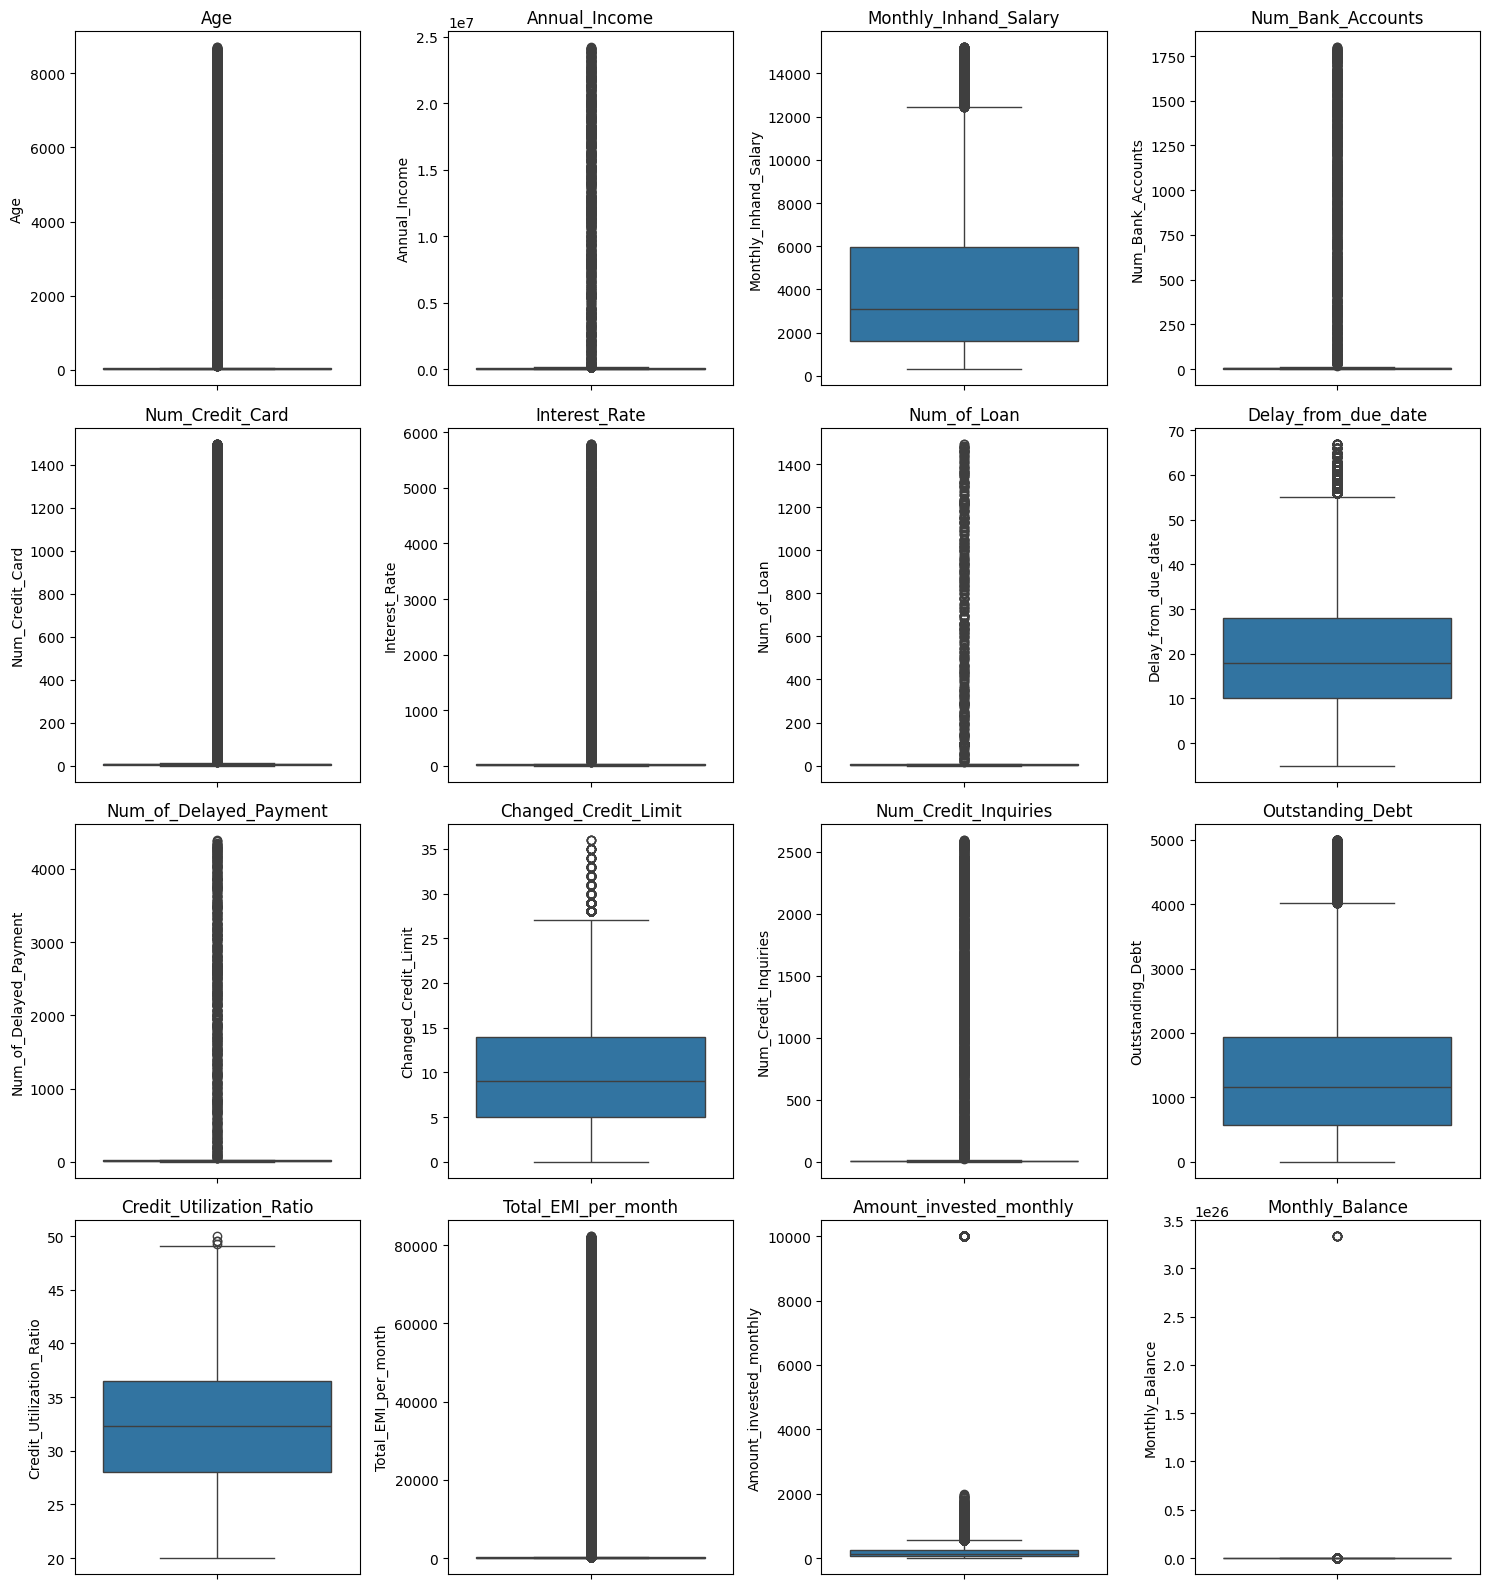

In [12]:
# Numerical columns
features = [col for col in df.columns if df[col].dtype != "object"]

# Box plot all numerical features to find feature with too many outliers
ncols = 4
nrows = (len(features) + ncols - 1) // ncols  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))

# Flatten the axes if there's only one row
if nrows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax = axes[row][col]
    if df[feature].dtype != "object":
        sns.boxplot(df[feature], ax=ax)
        ax.set_title(feature)

# Remove any empty subplots
for i in range(len(features), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

In [13]:
# First, remove all of outliers in numerical columns
df_filtered = df.copy()

for column in df_filtered.columns:
    if df_filtered[column].dtype != "object":
        print(column)
        quantile_val = df_filtered[column].quantile(0.96)
        df_filtered = df_filtered[(df_filtered[column] <= quantile_val) & (df_filtered[column] >= 0)]

Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance


In [14]:
# There is still some ridiculous outliers in these columns
df_filtered = df_filtered[df["Num_of_Loan"] <= 20]
df_filtered = df_filtered[df["Amount_invested_monthly"] <= 2000]

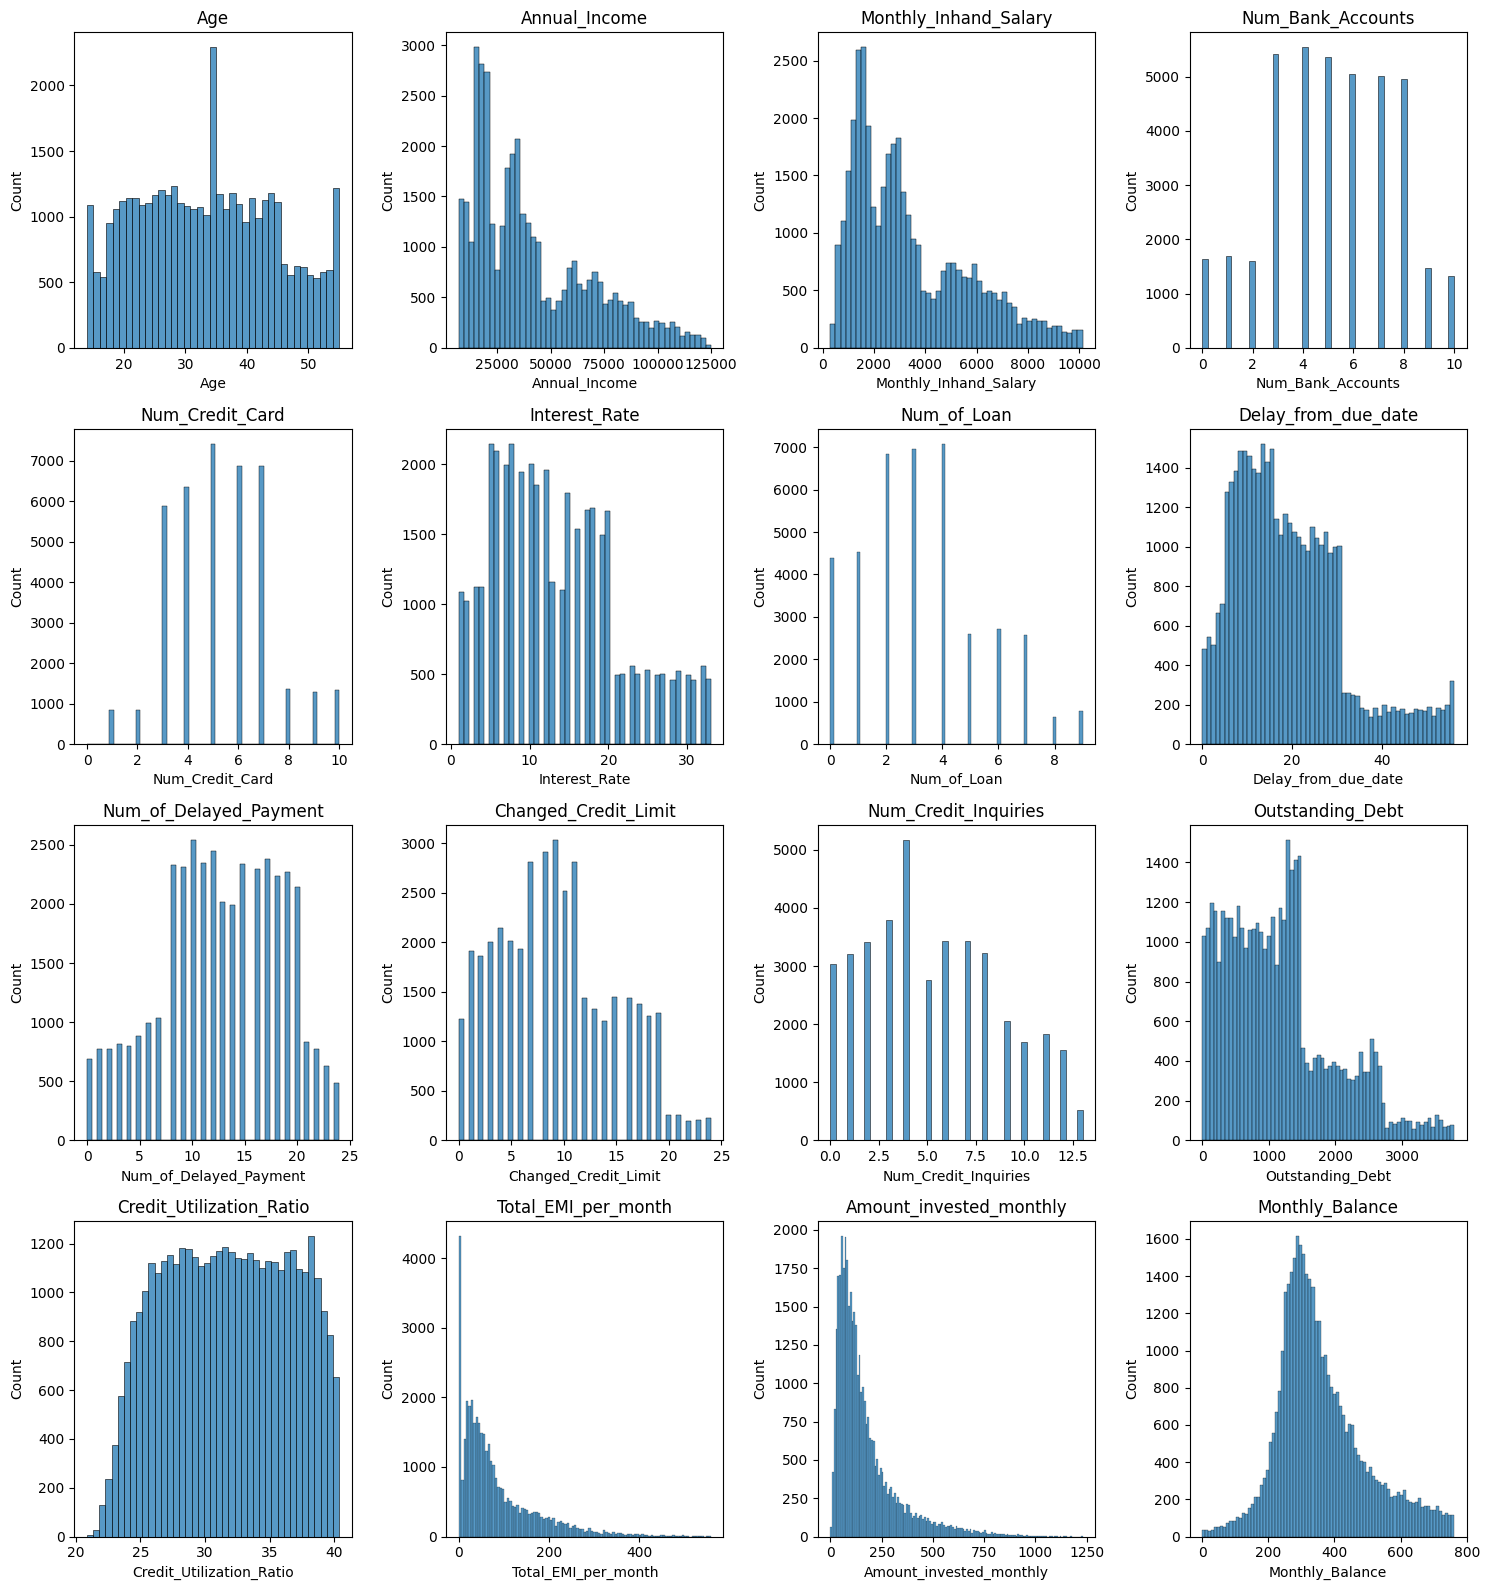

In [15]:
# Numerical columns
features = [col for col in df_filtered.columns if df_filtered[col].dtype != "object"]

# Box plot all numerical features to find feature with too many outliers
ncols = 4
nrows = (len(features) + ncols - 1) // ncols  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))

# Flatten the axes if there's only one row
if nrows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax = axes[row][col]
    sns.histplot(df_filtered[feature], ax=ax)
    ax.set_title(feature)

# Remove any empty subplots
for i in range(len(features), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

In [16]:
df_filtered.head().T

,0,6,7,8,9
ID,0x1602,0x1608,0x1609,0x160e,0x160f
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1,CUS_0x21b1
Month,January,July,August,January,February
Name,Aaron Maashoh,Aaron Maashoh,NaN,Rick Rothackerj,Rick Rothackerj
Age,23.0,23.0,23.0,28.0,28.0
SSN,821-00-0265,821-00-0265,#F%$D@*&8,004-07-5839,004-07-5839
Occupation,Scientist,Scientist,Scientist,_______,Teacher
Annual_Income,19114.0,19114.0,19114.0,34847.0,34847.0
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667
Num_Bank_Accounts,3,3,3,2,2


### 2.4. Target variable analysis

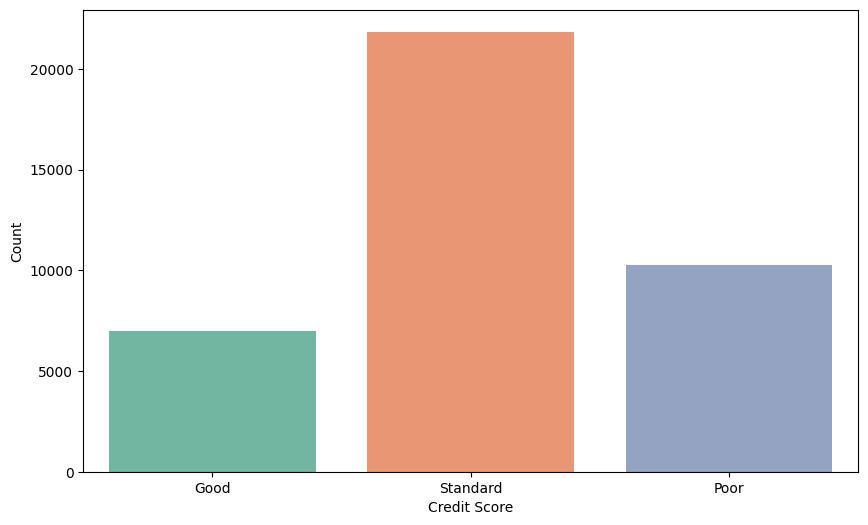

In [17]:
# Plot the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x="Credit_Score", palette="Set2")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

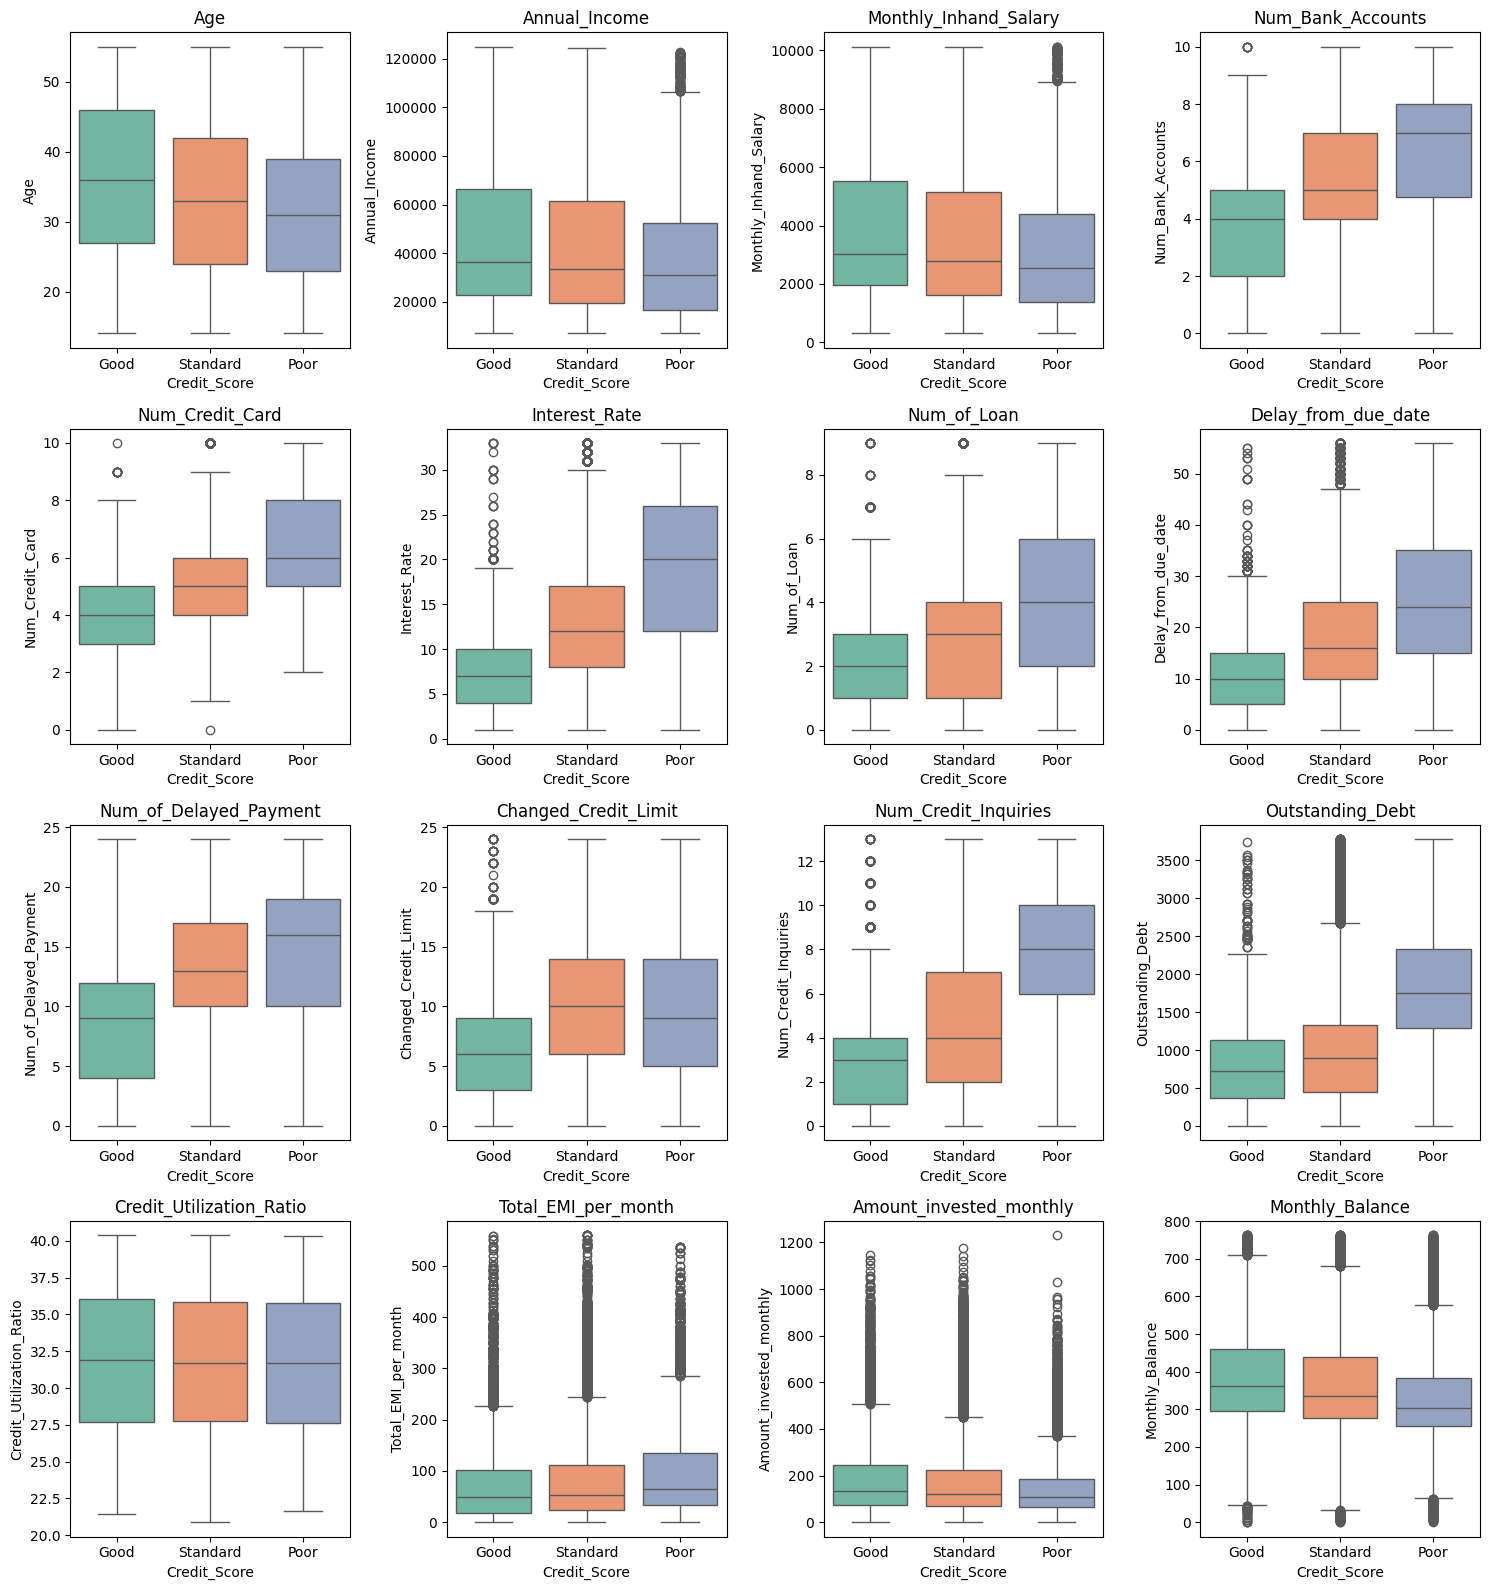

In [18]:
# Numerical columns
features = [col for col in df_filtered.columns if df_filtered[col].dtype != "object"]

# Box plot all numerical features with Credit Score
ncols = 4
nrows = (len(features) + ncols - 1) // ncols  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))

# Flatten the axes if there's only one row
if nrows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax = axes[row][col]
    sns.boxplot(df_filtered, x="Credit_Score", y=feature, palette="Set2", ax=ax)
    ax.set_title(feature)
    ax.set_xlabel("Credit_Score")
    ax.set_ylabel(feature)

# Remove any empty subplots
for i in range(len(features), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

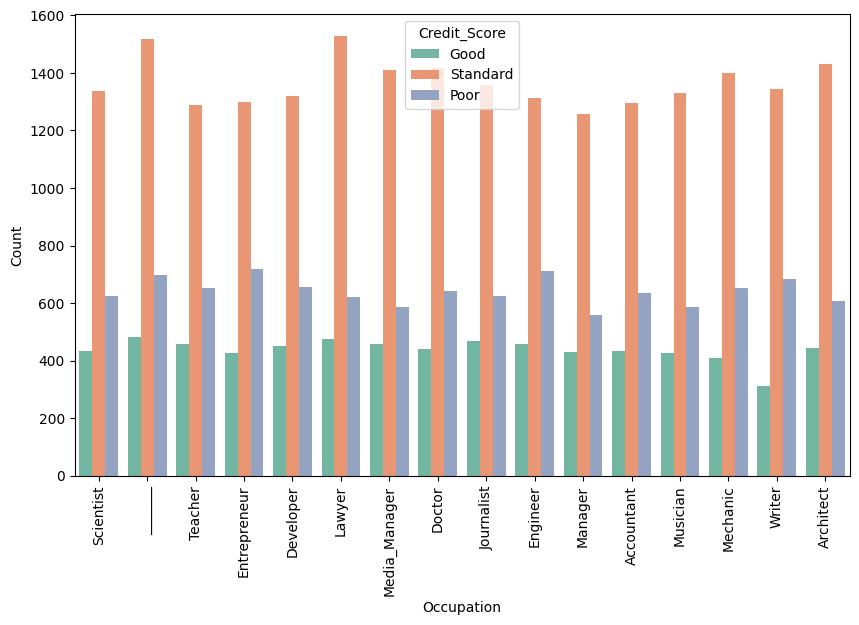

In [19]:
# Plot the target variable with Occupation feature
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x="Occupation", hue="Credit_Score", palette="Set2")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

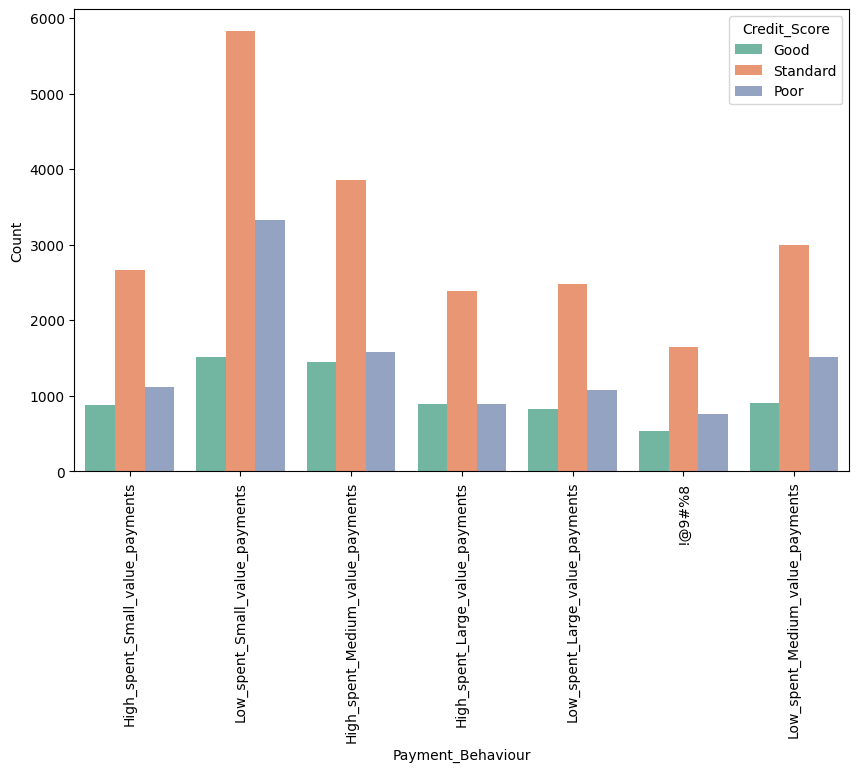

In [20]:
# Plot the target variable with Payemnt_Behaviour feature
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x="Payment_Behaviour", hue="Credit_Score", palette="Set2")
plt.xlabel("Payment_Behaviour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## 3. Feature Engineering

There are several steps in feature engineering in this notebook:

1. Drop non related columns
2. Convert strings to categories
3. Encode target variables

### 3.1. Drop non related columns

In [21]:
# Drop columns
column_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Credit_History_Age']
df_engineering = df_filtered.copy()
df_engineering = df_engineering.drop(column_to_drop, axis=1)

In [22]:
# New df
df_engineering.head().T

,0,6,7,8,9
Age,23.0,23.0,23.0,28.0,28.0
Occupation,Scientist,Scientist,Scientist,_______,Teacher
Annual_Income,19114.0,19114.0,19114.0,34847.0,34847.0
Num_Bank_Accounts,3,3,3,2,2
Num_Credit_Card,4,4,4,4,4
Interest_Rate,3,3,3,6,6
Num_of_Loan,4.0,4.0,4.0,1.0,1.0
Delay_from_due_date,3,3,3,3,7
Num_of_Delayed_Payment,7.0,8.0,6.0,4.0,1.0
Changed_Credit_Limit,11.0,11.0,11.0,5.0,7.0


### 3.2. Fix categorical column and encode

In [23]:
# Find the columns which contain strings
for label, content in df_engineering.items():
    if pd.api.types.is_object_dtype(content) and label != "Credit_Score":
        print(label)

Occupation
Credit_Mix
Payment_of_Min_Amount
Payment_Behaviour


#### Occupation

In [24]:
# Find if there any odd class in Occupation column
df_engineering["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Engineer',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [25]:
# Replace odd class in Occupation column
df_engineering["Occupation"] = df_engineering["Occupation"].str.replace("_______", "Other", regex=True)

In [26]:
# Encode the Occupation column
occupation_column = sorted(df_engineering["Occupation"].unique().tolist())
occupation_encoded = {occupation: i for i, occupation in enumerate(occupation_column)}
print(occupation_encoded)

# Encode the Occupation column
df_engineering['Occupation'] = df_engineering['Occupation'].map(occupation_encoded)

{'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Other': 12, 'Scientist': 13, 'Teacher': 14, 'Writer': 15}


#### Credit_Mix

In [27]:
# Credit mix
df_engineering["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [28]:
# Replace odd class in Credit_Mix column
df_engineering["Credit_Mix"] = df_engineering["Credit_Mix"].replace('_', np.nan, regex=True)

In [29]:
# Replace nan value in Credit_Mix column
df_engineering["Credit_Mix"] = df_engineering["Credit_Mix"].fillna(method="ffill")
df_engineering["Credit_Mix"] = df_engineering["Credit_Mix"].fillna(df_engineering["Credit_Mix"].mode()) # in case the first row is nan

In [30]:
# Encode the Credit_Mix column
credit_mix_encoded = {"Bad": 0, 
                      "Standard": 1, 
                      "Good": 2}

df_engineering["Credit_Mix"] = df_engineering["Credit_Mix"].map(credit_mix_encoded)

#### Payment_of_Min_Amount

In [31]:
# Payment_of_Min_Amount
df_engineering["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [32]:
# Encode the Payment_of_Min_Amount column
payment_min_encoded = {"No": 0, 
                       "NM": 1, 
                       "Yes": 2}

df_engineering["Payment_of_Min_Amount"] = df_engineering["Payment_of_Min_Amount"].map(payment_min_encoded)

#### Payment_Behaviour

In [33]:
# Find if there any odd class in Payment_Behaviour column
df_engineering["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Medium_value_payments'], dtype=object)

In [34]:
# Replace odd class in Payment_Behaviour column
df_engineering["Payment_Behaviour"] = df_engineering["Payment_Behaviour"].replace("!@9#%8", np.nan, regex=True)

# Replace nan value in Payment_Behaviour column
df_engineering["Payment_Behaviour"] = df_engineering["Payment_Behaviour"].fillna(method="ffill")
df_engineering["Payment_Behaviour"] = df_engineering["Payment_Behaviour"].fillna(df_engineering["Payment_Behaviour"].mode()) # in case the first row is nan

In [35]:
# Encode the Payment_Behaviour column
payment_behaviour_encoded = {'Low_spent_Small_value_payments': 0,
                             'Low_spent_Medium_value_payments': 1,
                             'Low_spent_Large_value_payments': 2,
                             'High_spent_Small_value_payments': 3,
                             'High_spent_Medium_value_payments': 4,
                             'High_spent_Large_value_payments': 5}

df_engineering["Payment_Behaviour"] = df_engineering["Payment_Behaviour"].map(payment_behaviour_encoded)

In [36]:
df_engineering.head().T

,0,6,7,8,9
Age,23.0,23.0,23.0,28.0,28.0
Occupation,13,13,13,12,14
Annual_Income,19114.0,19114.0,19114.0,34847.0,34847.0
Num_Bank_Accounts,3,3,3,2,2
Num_Credit_Card,4,4,4,4,4
Interest_Rate,3,3,3,6,6
Num_of_Loan,4.0,4.0,4.0,1.0,1.0
Delay_from_due_date,3,3,3,3,7
Num_of_Delayed_Payment,7.0,8.0,6.0,4.0,1.0
Changed_Credit_Limit,11.0,11.0,11.0,5.0,7.0


### 3.3. Encode the target variable

In [37]:
# Encode target label
credit_score_encoded = {"Poor": 0, 
                        "Standard": 1, 
                        "Good": 2}

df_engineering["Credit_Score"] = df_engineering["Credit_Score"].map(credit_score_encoded)

In [38]:
df_engineering["Credit_Score"].sample(5)

21429    2
52687    2
1951     1
11058    1
91331    2
Name: Credit_Score, dtype: int64

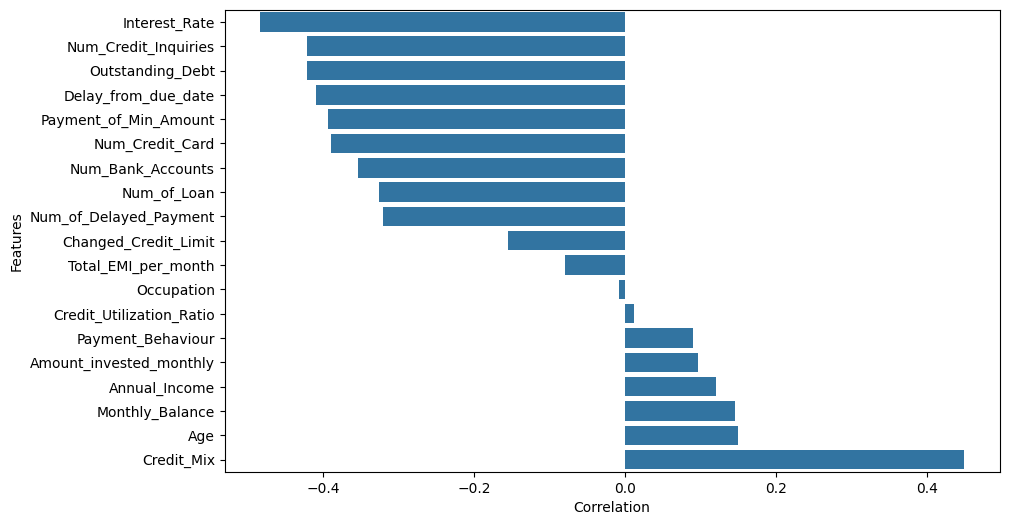

In [39]:
# Correlation of target variable with features
correlation_series = df_engineering.corr()['Credit_Score'][:-1].sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_series, y=correlation_series.index, orient="h")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

In [40]:
# Let's see the final dataset
df_engineering.head().T

,0,6,7,8,9
Age,23.000000,23.000000,23.000000,28.000000,28.000000
Occupation,13.000000,13.000000,13.000000,12.000000,14.000000
Annual_Income,19114.000000,19114.000000,19114.000000,34847.000000,34847.000000
Num_Bank_Accounts,3.000000,3.000000,3.000000,2.000000,2.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000
Interest_Rate,3.000000,3.000000,3.000000,6.000000,6.000000
Num_of_Loan,4.000000,4.000000,4.000000,1.000000,1.000000
Delay_from_due_date,3.000000,3.000000,3.000000,3.000000,7.000000
Num_of_Delayed_Payment,7.000000,8.000000,6.000000,4.000000,1.000000
Changed_Credit_Limit,11.000000,11.000000,11.000000,5.000000,7.000000


In [41]:
# Let's check if there any missing values
df_engineering.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [42]:
# Export preprocessed data
# df_engineering.to_csv("../data/train_preprocessed.csv", index=False)